In [2]:
!pip install wordcloud

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [3]:
df= pd.read_csv('./cleaned_BA_reviews.csv', index_col=0)
df = df.reset_index(drop=True)
df.head()

reviews  stars        date  \
0  Not Verified | I was excited to fly BA as I'd ...      5  2024-01-18   
1  Not Verified |  I just want to warn everyone o...      2  2024-01-17   
2  Not Verified | Paid for business class travell...      1  2024-01-16   
3  ✅ Trip Verified |  The plane was extremely dir...      1  2024-01-15   
4  Not Verified | Overall journey wasn’t bad howe...      1  2024-01-12   

          country  verified                                             corpus  
0  United Kingdom     False  verified excited fly ba travelled long haul yr...  
1         Germany     False  verified want warn everyone worst customer ser...  
2  United Kingdom     False  verified paid business class travelling cairo ...  
3         Ireland      True  plane extremely dirty chocolate smudged mine c...  
4  United Kingdom     False  verified overall journey bad however end bagga...

In [4]:
# AVERAGE RATINGS
df.stars.mean()

4.632904148783977

In [5]:
df.stars

0        5
1        2
2        1
3        1
4        1
        ..
3490     1
3491     7
3492     9
3493    10
3494    10
Name: stars, Length: 3495, dtype: int64

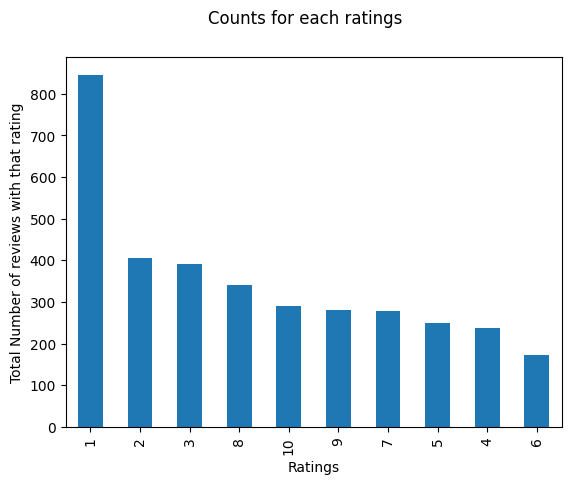

In [6]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings");

In [7]:
df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

df_ratings

stars  pct_values
1     845       24.18
2     406       11.62
3     391       11.19
8     342        9.79
10    290        8.30
9     282        8.07
7     279        7.98
5     249        7.12
4     238        6.81
6     173        4.95

In [8]:
df_ratings = df_ratings.reset_index()
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)
df_ratings

Stars  total_counts  pct_values
0      1           845       24.18
1      2           406       11.62
2      3           391       11.19
3      8           342        9.79
4     10           290        8.30
5      9           282        8.07
6      7           279        7.98
7      5           249        7.12
8      4           238        6.81
9      6           173        4.95

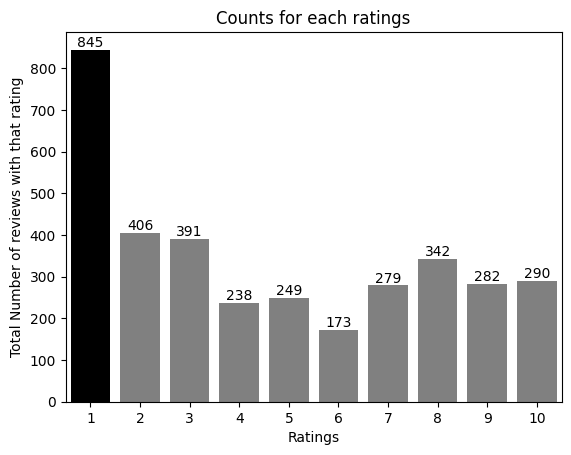

In [15]:
clrs = ['Black' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings");
        
        

In [25]:
df.country.unique().size  # unique countries

70

### Most visited country

In [27]:
df_country_review = pd.DataFrame(df.country.value_counts().head().reset_index())
df_country_review

index  country
0  United Kingdom     2180
1   United States      402
2       Australia      146
3          Canada      108
4         Germany       63

In [28]:
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)
df_country_review

country  total_reviews
0  United Kingdom           2180
1   United States            402
2       Australia            146
3          Canada            108
4         Germany             63

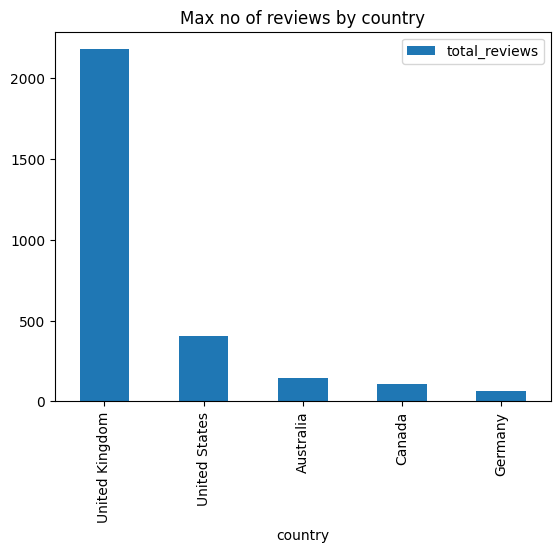

In [30]:
df_country_review.plot(kind ="bar", x="country")
plt.title("Max no of reviews by country");

### Which country provided on average highest ratings?

In [31]:
df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_1660\3646304042.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()


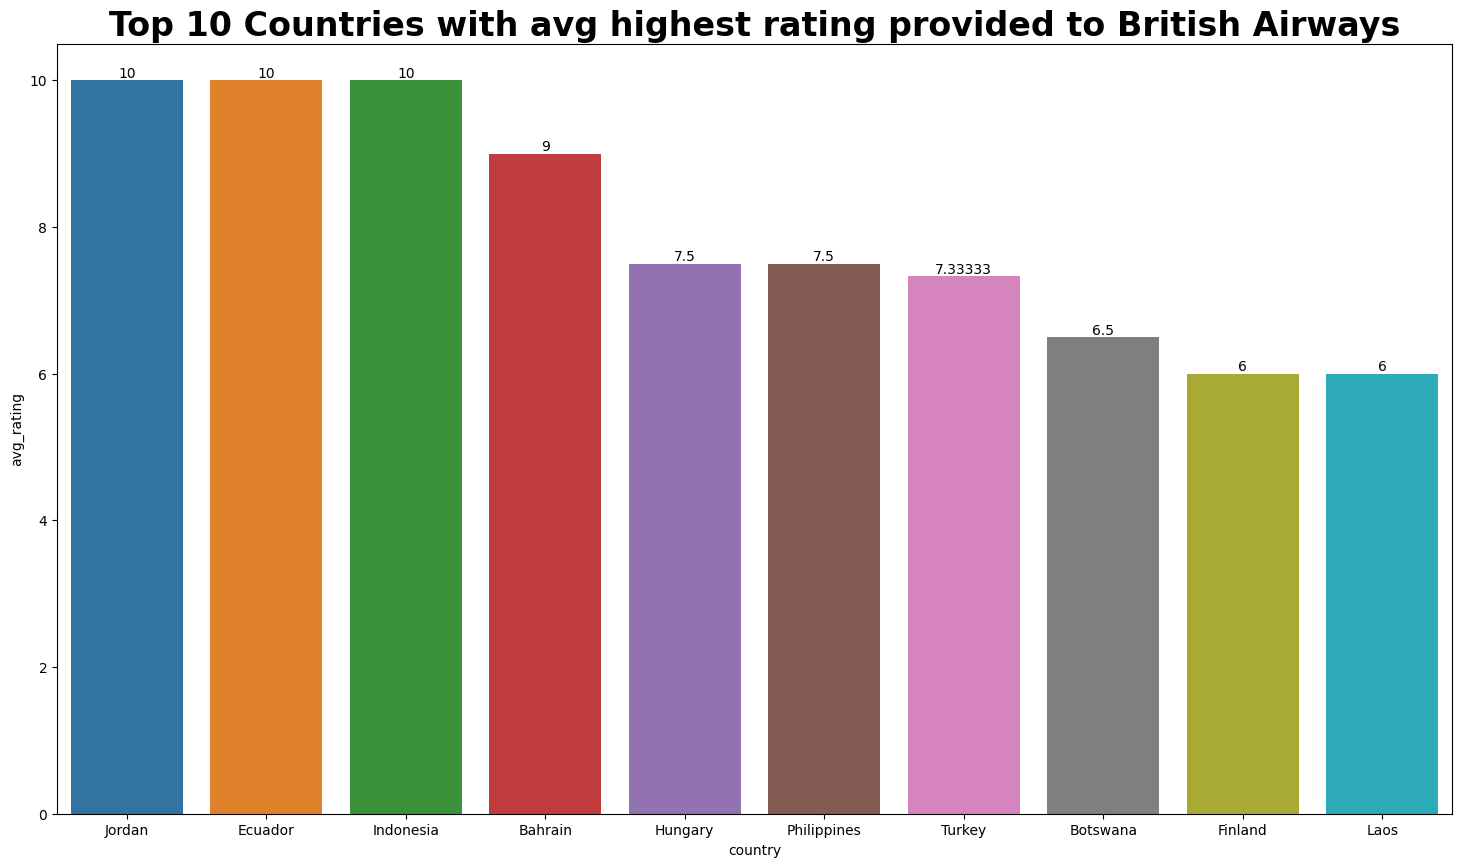

In [76]:
fig , ax = plt.subplots(figsize=(18,10))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:10])
ax.bar_label(ax.containers[0])
ax.set_title("Top 10 Countries with avg highest rating provided to British Airways", fontsize=24, fontweight="bold");

### Time Series analysis

In [39]:
df.date = pd.to_datetime(df.date)

fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()


Between April 2020 to August 2021 there has been a decline in reviews due to Covid Pandemic travel restrictions

In [41]:
import nltk
from nltk.corpus import stopwords

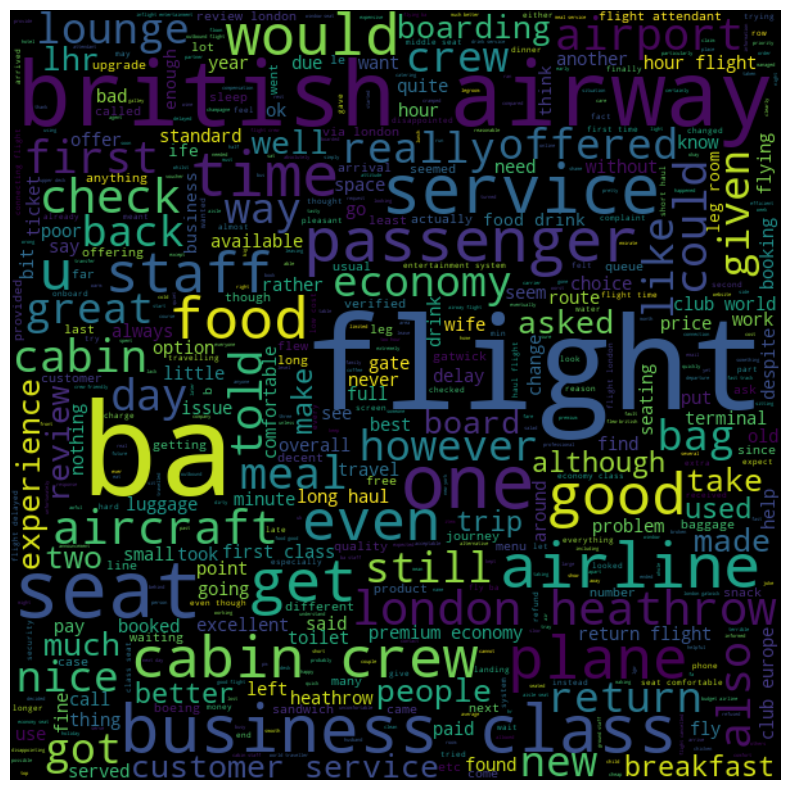

In [42]:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)


# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [43]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

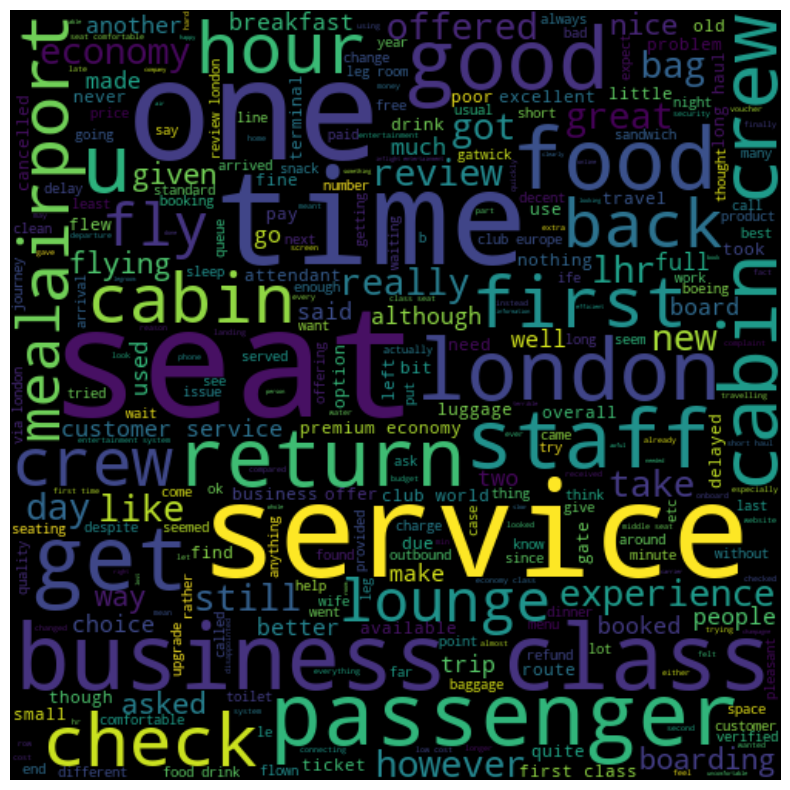

In [45]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])


# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Frequency

In [46]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

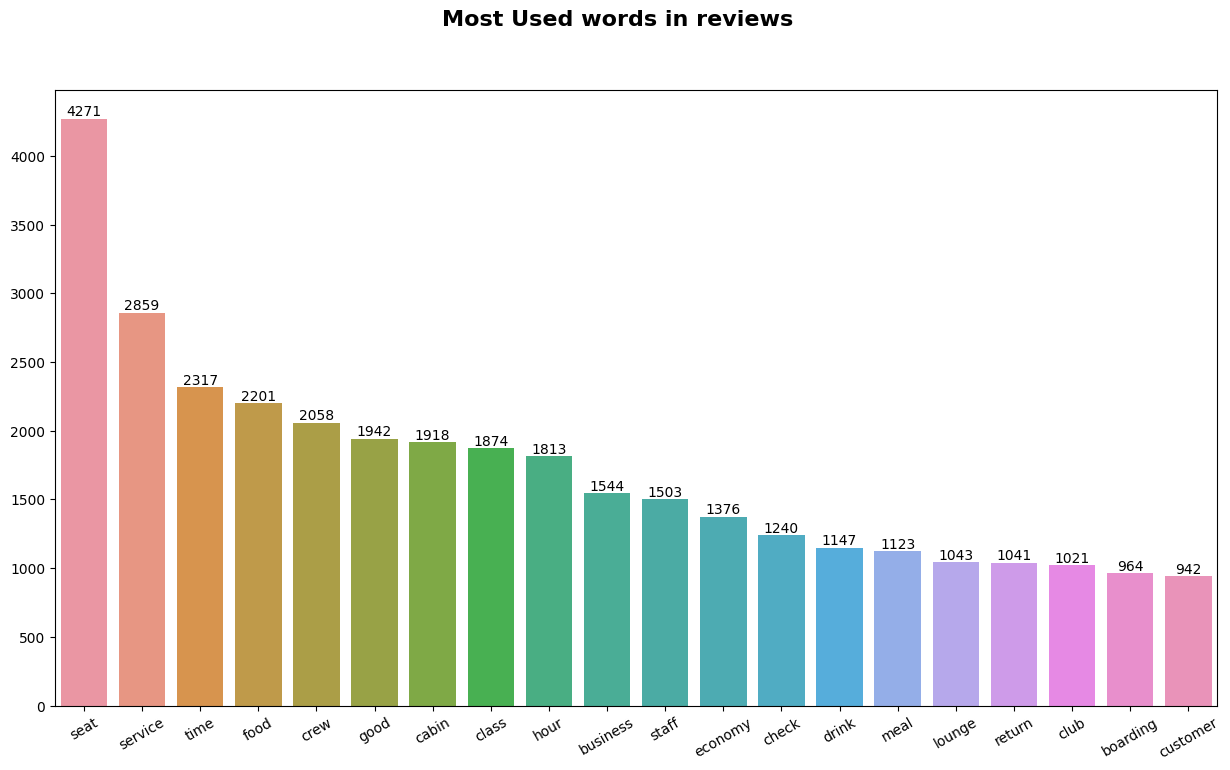

In [60]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)
fig.suptitle("Most Used words in reviews", fontsize=16, fontweight="bold");

### Word Frequency with N-gram


In [48]:
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]


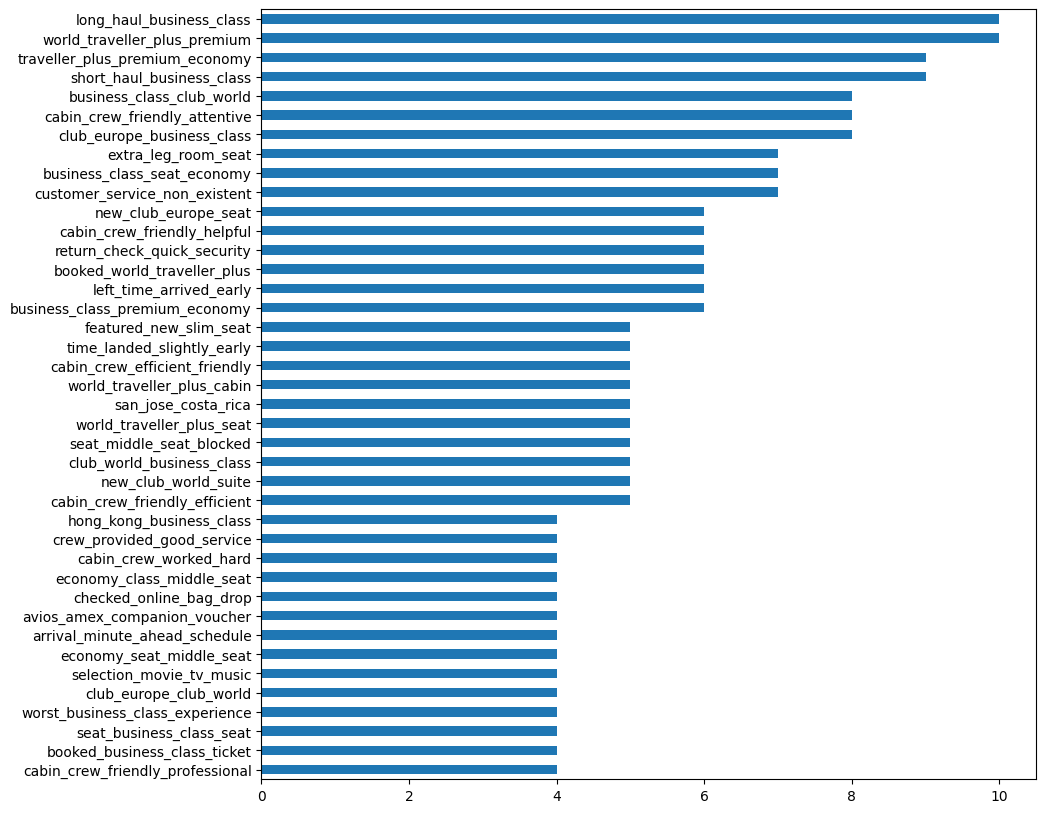

In [51]:
def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4);

In [52]:
ratings_1to3 = df[df.stars.isin([1,2,3])]
ratings_4to6 = df[df.stars.isin([4,5,6])]
ratings_7to10 = df[df.stars.isin([7,8,9,10])]

In [53]:
reviews_1to3 = " ".join(ratings_1_3.corpus)
reviews_4to6 = " ".join(ratings_4_6.corpus)
reviews_7to10 = " ".join(ratings_7_10.corpus)

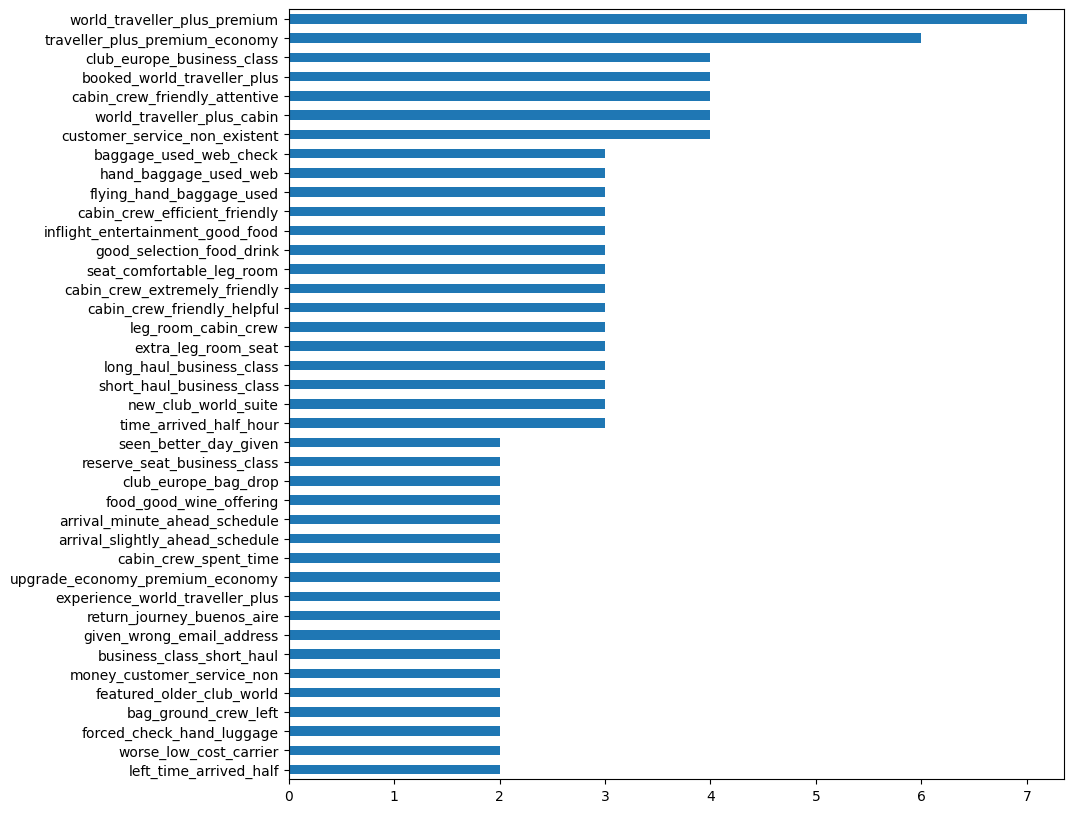

In [55]:
#split the text of all reviews into a list of words
words_1to3 = reviews_1_3.split(" ")
words_4to6 = reviews_4_6.split(" ")
words_7to10 = reviews_7_10.split(" ")


new_words_7to10 = [word for word in words_7to10 if word not in stopwords]

get_freq_dist(new_words_7to10,4);

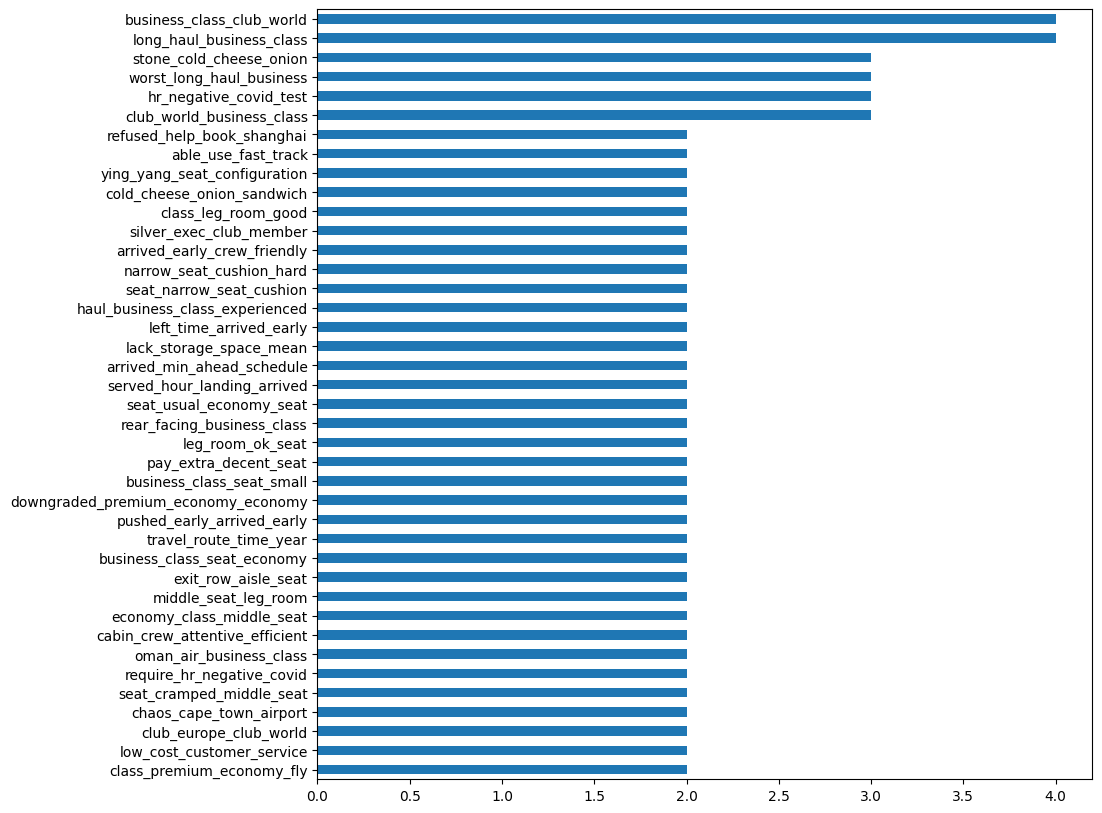

In [57]:
new_words = [word for word in words_4to6 if word not in stopwords]

get_freq_dist(new_words,4);

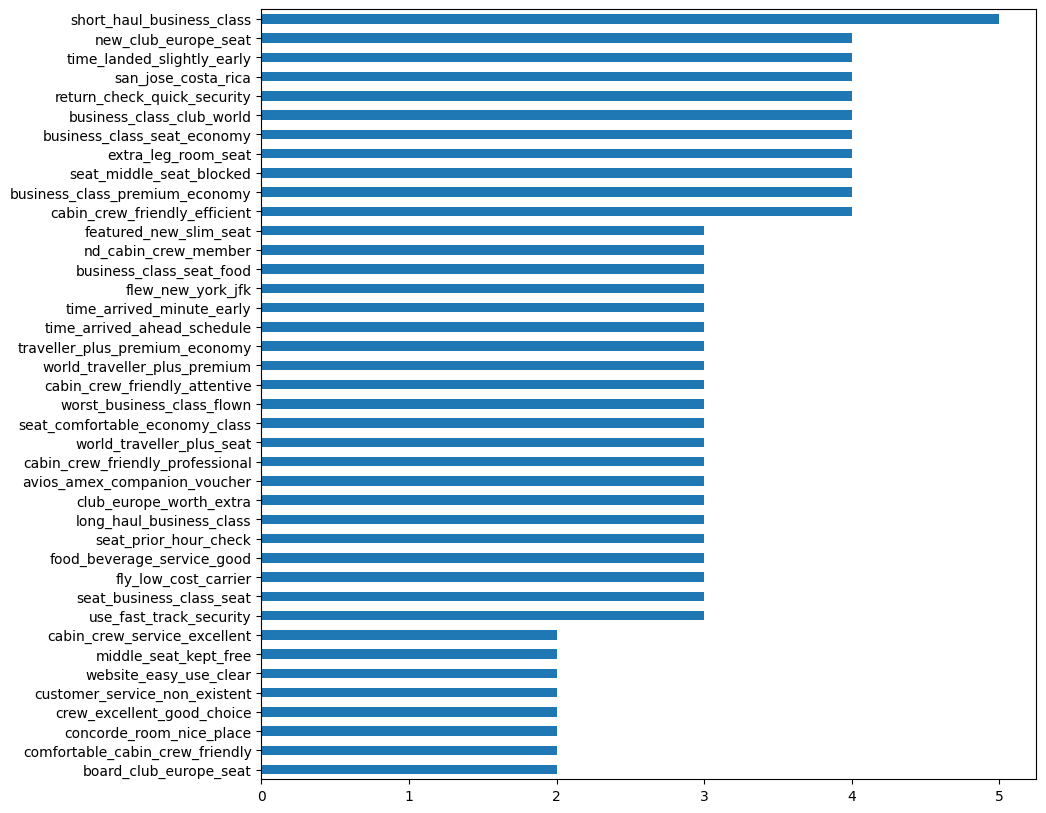

In [73]:
new_words = [word for word in words_1to3 if word not in stopwords]

get_freq_dist(new_words,4);

     -------------------------------------- 636.8/636.8 kB 6.7 MB/s eta 0:00:00


In [64]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.corpus)):
    sent= TextBlob(df.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

In [65]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")


2381 number of reviews between -0.2 and 0.2 polarity score
1389 number of reviews between -0.1 and 0.1 polarity score


In [67]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names_out()

In [68]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [69]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0          seat          2780.8        flight          1396.8            ba   
1        flight          1457.5            ba          1225.4      customer   
2            ba           957.1        lounge           929.7       airline   
3       economy           712.5         class           924.5       service   
4          food           671.6          good           858.2       british   
5         cabin           631.7          seat           837.6        airway   
6         class           629.7       service           830.2        flight   
7       british           496.5          food           817.3        ticket   
8      business           495.3          crew           817.0          year   
9          good           492.6          club           734.0       booking   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0           624.8        flight          2328.6        flight          1242.9   
1           447.4            ba           903.8        airway           508.5   
2           364.4          hour           842.2       british           504.1   
3           330.6        london           539.3          crew           480.4   
4           315.4           day           520.7       service           431.3   
5           308.9          told           518.0          food           429.0   
6           289.2         would           445.6            ba           423.5   
7           182.9       airport           442.0        london           421.4   
8           162.8          time           440.8         cabin           414.5   
9           149.8           get           427.6          time           360.8   

  Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights Topic 7 words  \
0        airway           201.6        flight           420.9         staff   
1       british           192.9            ba           286.5            ba   
2        london            71.4           lhr           208.6       service   
3         class            44.0          good           195.2        flight   
4      heathrow            42.8        london           169.9         check   
5       airline            35.6          food           161.1     passenger   
6          even            33.3       service           159.1           one   
7        review            33.2         great           153.6           bag   
8      customer            28.0          meal           143.3          seat   
9        flight            27.5          crew           127.2         cabin   

  Topic 7 weights  
0           388.0  
1           368.5  
2           358.4  
3           337.6  
4           299.5  
5           239.7  
6           237.6  
7           214.9  
8           213.3  
9           195.8

### Topic modeling with NMF

In [70]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.06229401, 0.14510411],
       [0.06084394, 0.28896834],
       [0.07457604, 0.0258851 ],
       ...,
       [0.1726692 , 0.        ],
       [0.16343868, 0.09945279],
       [0.04968196, 0.05644377]])

In [71]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [72]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights
0          seat            23.2        flight            21.3
1            ba            13.3            ba             7.2
2         class            10.3          hour             5.0
3          food             8.3          time             4.0
4      business             8.2        london             3.9
5       service             8.1        airway             3.8
6         cabin             7.7       british             3.8
7          good             7.5       service             3.4
8          crew             7.3         would             3.2
9       economy             6.4       airline             2.8